# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

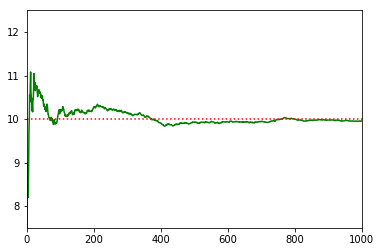

In [115]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
%matplotlib inline

poisson = rd.poisson(10, 1000)

avg = np.mean(poisson)

i_sums = np.zeros(poisson.shape, dtype = float)
s_dev = np.zeros(poisson.shape, dtype = float)

for i in range(1, 1000):
    i_sums[i] = sum(poisson[:i])/i
    s_dev[i] = sum(poisson[:i]) - i*avg
    s_dev[i] = np.sqrt(abs(s_dev[i] / i))
    
#plt.hist(poisson, bins=range(1, 20))
plt.plot(s_dev, color='b')
plt.plot(i_sums, color='g')
plt.axhline(y=10.0, color='r', linestyle=':')
axes = plt.gca()
axes.set_ylim([7.5, 12.5])
axes.set_xlim([1, 1000])
plt.show()

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

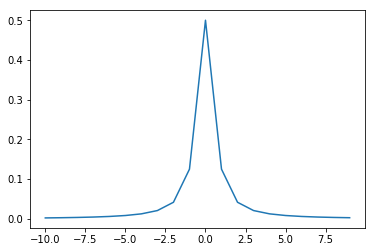

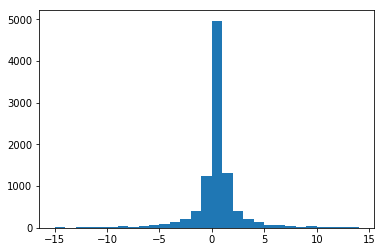

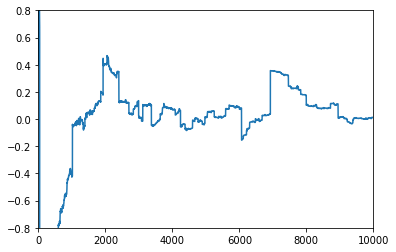

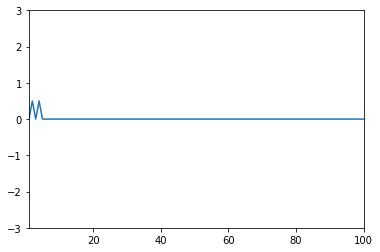

array([ 0,  1,  0,  3, -1, -2,  1,  0,  0])

In [162]:
# The formula describes a discrete distribution since the sum of the probabilities
# for all values of k apart from 0 is equal to 2 * the sum of the probabilities for
# k between 1 and infinity due to the presence of the absolute value operator. This
# sum in turn converges to 1/2. The sum of the probabilities for integer values of X
# is equal to 1.

import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import math as mt

def distribution(k):
    if (k != 0):
        return 1 / (4 * abs(k) * (abs(k) + 1))
    else:
        return 0.5
    
small_range = [distribution(i) for i in range(-10, 10)]

plt.plot(range(-10, 10), small_range)
plt.show()

def sample(pos):
    is_zero = rd.random()
    
    # The sampled argument is zero with a probability of 1/2
    # in accordance with the distribution's definition.
    
    if (is_zero <= 0.5) :
            
        # Positive and negative arguments of equal value are
        # equally probable.
        #
        # On basis of the fact estabilished during the last lab:
        #
        # floor ( 1 / k ) = 
        # 
        # 1 for k in range ( 1/2, 1 ) and thus:
        # P(floor(1/k) = 1) = P(floor(1/k) = -1) = 1/2 ^ 3 = 1/8
        #
        # 2 for k in range ( 1/2, 1/3 ) and thus:
        # P(floor(1/k) = 2) = P(floor(1/k) = -2) = 1/2 ^ 2 * 1/6 = 1/24
        #
        # etc.
        #
        # we can sample an argument with correct probabilities
        # in the following way:
        
        sign = [-1, 1]
        k = rd.random()
        arg = mt.floor(1 / k)
        return rd.choice(sign) * arg
    else:
        return 0
    
# The function initializing the array of sampled values is vectorized.    

vSamples = np.vectorize(sample)
vTab = np.fromfunction(vSamples, (10000, ), dtype = float)

# Calculating and plotting the averages and medians.

plt.hist(vTab, bins = range(-15, 15))
plt.show()

averages = np.zeros(vTab.shape, dtype = float)

for i in range(0, 10000):
    averages[i] = vTab[i] if (i == 0) else (i*averages[i-1] + vTab[i]) / (i+1) 
    
plt.plot(averages)
axes = plt.gca()
axes.set_ylim([-0.8, 0.8])
axes.set_xlim([1, 10000])
plt.show()

medians = np.zeros(1000, dtype = float)

for i in range(1, 1000):
    medians[i] = np.median(vTab[1:i+1])
    
plt.plot(medians)
axes = plt.gca()
axes.set_ylim([-3.0, 3.0])
axes.set_xlim([1, 100])
plt.show()

vTab[1:10]



**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.